## Ships in Satellite Imagery

### Context:

Detecting the location of large ships in satellite images.

### Content:

This dataset is from Planet satellite imagery which collected over the San Francisco Bay and San Pedro Bay areas of California. It includes 4000 80x80 RGB images labeled with either a "ship" or "no-ship" classification.

label: Valued 1 representing the "ship" class, valued 0 representing the "no-ship" class.

scene id: The unique identifier of the PlanetScope visual scene the image chip was extracted from. The scene id can be used with the Planet API to discover and download the entire scene.

longitude_latitude: The longitude and latitude coordinates of the image center point, with values separated by a single underscore.

80x80 RGB image is stored as a list of 19200 integers. The first 6400 entries includes the red channel values, the next 6400 is green, third 6400 is blue. 

# Data Wrangling and EDA

In [29]:
#Import the necessary modules

import json
import matplotlib.pyplot as plt
from skimage import color
import numpy as np

from keras.utils import np_utils

In [30]:
#Download the dataset
f = open('C://Users//kurt_//Downloads//shipsnet.json//shipsnet.json')
dataset = json.load(f)
f.close()

In [31]:
dataset.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

In [34]:
#Convert datas from list to array
data_ = np.array(dataset['data']).astype('uint8')
labels_ = np.array(dataset['labels']).astype('uint8')

#It will be seen from the shape that data includes 4000 images and every image represented as a vector of length 19200 elements.
print(data_.shape)
print(labels_.shape)

(4000, 19200)
(4000,)


In [35]:
#Check for NULL values in data and labels
print(np.isnan(data_).sum())
print(np.isnan(labels_).sum())

0
0


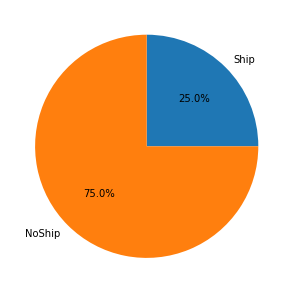

Number of ship: 1000
Number of no-ship: 3000


In [36]:
#Check for ship/no-ship numbers 
number_ship = np.sum(labels_==1)
number_noship = np.sum(labels_==0)

sizes = [number_ship, number_noship]
titles = "Ship", "NoShip"

fig = plt.figure(figsize=(5, 7))
plt.pie(sizes, labels=titles, autopct='%1.1f%%')
plt.show() 

print('Number of ship:', number_ship)
print('Number of no-ship:', number_noship)

In [37]:
#Color channel 3:RGB
n_spct = 3
w = 80
h = 80
data_ = data_.reshape([-1, n_spct, w, h])

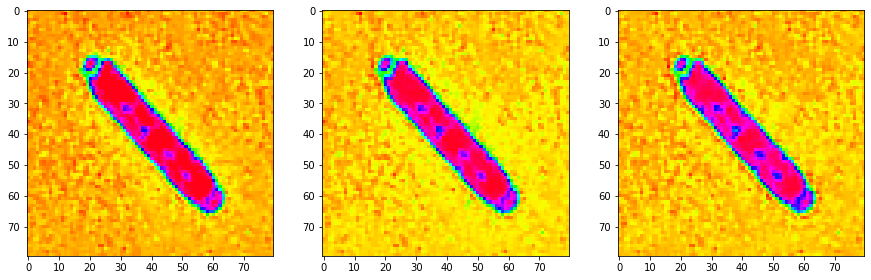

In [39]:
#Get one channel
pic = data_[0]

red_spct = pic[0]
green_spct = pic[1]
blue_spct = pic[2]

#Plot each channel
plt.figure(figsize=(15, 5))
plt.set_cmap('hsv')

plt.subplot(1, 3, 1)
plt.imshow(red_spct)

plt.subplot(1, 3, 2)
plt.imshow(green_spct)

plt.subplot(1, 3, 3)
plt.imshow(blue_spct)

plt.show()

In [40]:
#Reshape the data
data = data_.transpose([0, 2, 3, 1])

In [41]:
#Check for shapes
print(data.shape)
print(labels_.shape)

(4000, 80, 80, 3)
(4000,)


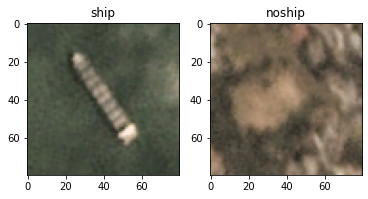

In [42]:
#Check for images with ship and no_ship
noship = data[labels_==0]
ship = data[labels_==1]

def plot_(x, y):
    
    plt.figure(figsize=(6, 8))

    plt.subplot(1, 2, 1)
    plt.title('ship')
    plt.imshow(ship[1])

    plt.subplot(1, 2, 2)
    plt.title('noship')
    plt.imshow(noship[1])

    plt.show()

plot_(ship, noship)

Grayscaling: It is a process which convert an image from other color spaces e.g RGB, CMYK, HSV, etc. to grayscale. It varies between complete black and complete white.

In [43]:
#Convert the RGB images to grayscale, so that have one number for each pixel. 
data_gray = [color.rgb2gray(x) for x in data]
data_gray = np.array(data_gray)

1


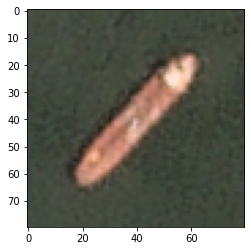

In [44]:
#Check for one image
plt.imshow(data[8])
print(labels_[8])

In [28]:
#Check for shape
print(data_gray.shape)

(4000, 80, 80)


In [49]:
#Convert labels to categorical 
labels = np_utils.to_categorical(labels_, 2)
print(labels.shape)

(4000, 2)
